<a href="https://colab.research.google.com/github/iamankan/fruits-ml/blob/conference1/FruitmlTL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
w, h = (224, 224)
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(w, h, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

58900480/58889256 [==============================] - 0s 0us/step


In [3]:
#Freeze the base model
base_model.trainable = False

In [4]:
inputs = keras.Input(shape=(w, h, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
outputs = keras.layers.Dense(6, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
BATCH_SIZE = 32

train_generator = ImageDataGenerator()

val_generator = ImageDataGenerator()

test_generator = ImageDataGenerator()

In [7]:
train_data_dir = '/content/drive/MyDrive/fruit-ml/fruit_data/train'
test_data_dir = '/content/drive/MyDrive/fruit-ml/fruit_data/test'
val_data_dir = '/content/drive/MyDrive/fruit-ml/fruit_data/validation'

In [8]:
traingen = train_generator.flow_from_directory(train_data_dir,
                                               target_size=(w, h),
                                               class_mode='categorical',
#                                                classes=class_subset,
#                                                subset='training',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=42)

validgen = val_generator.flow_from_directory(val_data_dir,
                                               target_size=(w, h),
                                               class_mode='categorical',
#                                                classes=class_subset,
#                                                subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

testgen = test_generator.flow_from_directory(test_data_dir,
                                             target_size=(w, h),
                                             class_mode='categorical',
#                                              classes=class_subset,
                                             batch_size=1,
                                             shuffle=False,
                                             seed=42)

Found 11629 images belonging to 6 classes.
Found 1289 images belonging to 6 classes.
Found 5534 images belonging to 6 classes.


In [10]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/fruit-ml/checkpoint_file.h5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2)

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(traingen, epochs=5, validation_data= validgen,
              callbacks=[model_checkpoint_callback])

import matplotlib.pyplot as plt
import numpy

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/5
364/364 [==============================] - 6065s 17s/step - loss: 3.0627 - categorical_accuracy: 0.9331 - val_loss: 0.9604 - val_categorical_accuracy: 0.9604
Epoch 2/5
364/364 [==============================] - 6039s 17s/step - loss: 0.2997 - categorical_accuracy: 0.9851 - val_loss: 0.4009 - val_categorical_accuracy: 0.9783
Epoch 3/5
364/364 [==============================] - 6068s 17s/step - loss: 0.2409 - categorical_accuracy: 0.9874 - val_loss: 1.7751 - val_categorical_accuracy: 0.9581
Epoch 4/5
364/364 [==============================] - 6166s 17s/step - loss: 0.4556 - categorical_accuracy: 0.9851 - val_loss: 2.5870 - val_categorical_accuracy: 0.9449
Epoch 5/5
364/364 [==============================] - 5971s 16s/step - loss: 0.3331 - categorical_accuracy: 0.9894 - val_loss: 0.8382 - val_categorical_accuracy: 0.9783
dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


KeyError: ignored

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


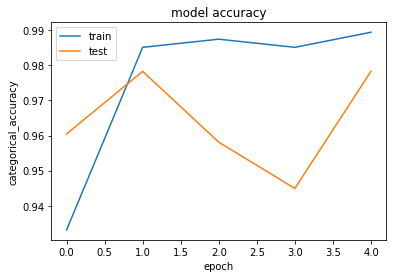

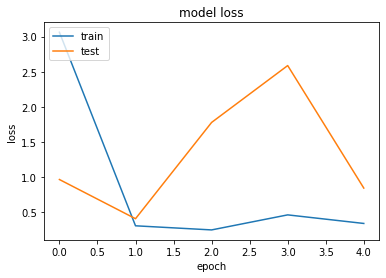

In [12]:
import matplotlib.pyplot as plt
import numpy

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()